In [17]:
# 导入所需的库
# 在此使用Xgboost RandomForest DecisionTree进行分析
import numpy as np
import pandas as pd
import pylab as plt 
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from SALib.sample import saltelli 
from SALib.analyze import sobol
from SALib.plotting.bar import plot as barplot
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签

In [18]:
# 数据处理
temperature = pd.read_excel("C:\MathModel\校选\附件1.xlsx", sheet_name="温度(temperature)")
temperature.columns = ['Time', 'Temperature of system 1', 'Temperature of system 2']
temperature['Data'] = pd.to_datetime(temperature['Time'])
temperature['Data'] = pd.to_datetime(temperature['Data']).dt.normalize()
quality = pd.read_excel("C:\MathModel\校选\附件1.xlsx", sheet_name="产品质量(quality of the products)")
quality.columns = ['Time', 'Index A', 'Index B', 'Index C', 'Index D']
parameter = pd.read_excel("C:\MathModel\校选\附件1.xlsx", sheet_name="原矿参数(mineral parameter)")
parameter.columns = ['Time', 'Mineral parameter 1', 'Mineral parameter 2', 'Mineral parameter 3', 'Mineral parameter 4']
temp_data = pd.merge(temperature, parameter, left_on='Data', right_on='Time')
quality['data'] = pd.to_datetime(quality['Time']) - pd.Timedelta(hours = 2)
datas = pd.merge(temp_data, quality, left_on='Time_x', right_on='data')

In [19]:
# 第一问预测标签ABCD
x = np.array([datas['Temperature of system 1'], datas['Temperature of system 2'],
            datas['Mineral parameter 1'], datas['Mineral parameter 2'], 
            datas['Mineral parameter 3'], datas['Mineral parameter 4']])
yA = np.array(datas['Index A'])
yB = np.array(datas['Index B'])
yC = np.array(datas['Index C'])
yD = np.array(datas['Index D'])

In [20]:
# 第二问预测温度
x = np.array([datas['Index A'], datas['Index B'],
            datas['Index C'], datas['Index D'],
            datas['Mineral parameter 1'], datas['Mineral parameter 2'],
            datas['Mineral parameter 3'], datas['Mineral parameter 4']])
y_T1 = np.array(datas['Temperature of system 1'])
y_T2 = np.array(datas['Temperature of system 2'])

In [21]:
# 划分训练集和测试集
# 创建训练集和测试集
seed = 10
test_size = 0.1
x_train, x_test, y_train, y_test = train_test_split(x.T, y_T1, test_size=test_size, random_state=seed)

In [22]:
# 进行模型的创建和训练
# xgboost模型
model_xgb = XGBRegressor()
model_xgb.fit(x_train, y_train)
y_pred_xgb = model_xgb.predict(x_test)
print("Xgboost模型均方误差:", mean_squared_error(y_true=y_test, y_pred=y_pred_xgb))
print("Xgboost预测评价:", model_xgb.score(X=x_test, y=y_test))

Xgboost模型均方误差: 30225.67697797449
Xgboost预测评价: 0.6677885579744027


In [23]:
# 随机森林模型
model_forest = RandomForestRegressor()
model_forest.fit(x_train, y_train)
y_pred_forest = model_forest.predict(x_test)
print("RandomForest模型均方误差:", mean_squared_error(y_true=y_test, y_pred=y_pred_forest))
print("RandomForest预测评价:", model_forest.score(X=x_test, y=y_test))

RandomForest模型均方误差: 23731.59537234543
RandomForest预测评价: 0.7391652294186865


In [24]:
# DecisionTree模型
model_tree = DecisionTreeRegressor()
model_tree.fit(x_train, y_train)
y_pred_tree = model_tree.predict(x_test)
print("DecisionTree模型均方误差:", mean_squared_error(y_true=y_test, y_pred=y_pred_tree))
print("DecisionTree预测评价:", model_tree.score(X=x_test, y=y_test))

DecisionTree模型均方误差: 15478.624783333327
DecisionTree预测评价: 0.8298739094051912


[]

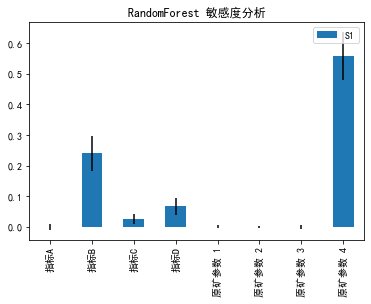

In [25]:
# 敏感度分析
problem = {
        'num_vars':8,
        'names':['指标A', '指标B', '指标C', '指标D',
                '原矿参数 1', '原矿参数 2', 
                '原矿参数 3', '原矿参数 4'],
        'bounds':[[70.00, 80.00], [20.00, 30.00], 
                [10.00, 20.00], [10.00, 20.00],
                [50.00, 60.00], [100.00, 110.00],
                [40.00, 50.00], [20.00, 30.00]]
}
param_values = saltelli.sample(problem, 1024)
y_out = model_forest.predict(param_values)
Si = sobol.analyze(problem, y_out)
Si_df = Si.to_df()
barplot(Si_df[1])
plt.title('RandomForest 敏感度分析')
plt.plot()

In [4]:
# 关于附录二
# 数据导入
temperature = pd.read_excel("C:\MathModel\校选\附件2.xlsx", sheet_name="温度(temperature)")
temperature.columns = ['Time', 'Temperature of system 1', 'Temperature of system 2']
temperature['Date'] = temperature['Time'].dt.normalize()
quality = pd.read_excel("C:\MathModel\校选\附件2.xlsx", sheet_name="产品质量(quality of the products)")
quality.columns = ['Time', 'Index A', 'Index B', 'Index C', 'Index D']
mineral = pd.read_excel("C:\MathModel\校选\附件2.xlsx", sheet_name="原矿参数(mineral parameter)")
mineral.columns = ['Time', 'Mineral parameter 1', 'Mineral parameter 2', 'Mineral parameter 3', 'Mineral parameter 4']
process = pd.read_excel("C:\MathModel\校选\附件2.xlsx", sheet_name="过程数据(process parameter)")
process.columns = ['Time', 'Process parameter 1', 'Process parameter 2', 'Process parameter 3', 'Process parameter 4']

In [5]:
# 数据处理
temp1_data = pd.merge(temperature, mineral, left_on='Date', right_on='Time')
quality['date'] = pd.to_datetime(quality['Time']) - pd.Timedelta(hours = 2)
temp2_data = pd.merge(temp1_data, quality, left_on='Time_x', right_on='date')
# pd.merge_asof(temp2_data, process, left_on='Time_x', right_on='Time', suffixes=('_1', '_2'), direction='backward')
res1 = pd.merge_asof(temp2_data, process, left_on='Time_x', right_on='Time', suffixes=('_1', '_2'))
res_ = res1.dropna()

In [6]:
res_count = pd.DataFrame()
res_count['Passrate_bool'] = (res_['Index A'] > 77.78) & (res_['Index A'] < 80.33) & (res_['Index B'] < 24.15) & (
            res_['Index C'] < 17.15) & (res_['Index D'] < 15.62)
res_count['Date'] = res_['Date']
grouped = res_count.groupby(res_count['Date']).mean()
res = pd.DataFrame()
res = pd.merge(res_, grouped, on='Date')
res = res.rename( columns={'Passrate_bool': 'Passrate'})
res

,Time_x,Temperature of system 1,Temperature of system 2,Date,Time_y,Mineral parameter 1,Mineral parameter 2,Mineral parameter 3,Mineral parameter 4,Time_1,...,Index B,Index C,Index D,date,Time_2,Process parameter 1,Process parameter 2,Process parameter 3,Process parameter 4,Passrate
0,2022-01-25 02:50:00,1273.86,938.16,2022-01-25,2022-01-25,55.26,108.03,43.29,20.92,2022-01-25 04:50:00,...,21.42,10.68,17.63,2022-01-25 02:50:00,2022-01-25 02:30:11,1.25,3.09,226.16,181.23,0.227273
1,2022-01-25 03:50:00,1273.51,937.49,2022-01-25,2022-01-25,55.26,108.03,43.29,20.92,2022-01-25 05:50:00,...,21.20,10.16,16.92,2022-01-25 03:50:00,2022-01-25 02:30:11,1.25,3.09,226.16,181.23,0.227273
2,2022-01-25 04:50:00,1272.84,936.67,2022-01-25,2022-01-25,55.26,108.03,43.29,20.92,2022-01-25 06:50:00,...,20.75,10.16,15.75,2022-01-25 04:50:00,2022-01-25 02:30:11,1.25,3.09,226.16,181.23,0.227273
3,2022-01-25 05:50:00,1404.50,959.90,2022-01-25,2022-01-25,55.26,108.03,43.29,20.92,2022-01-25 07:50:00,...,23.30,11.55,15.84,2022-01-25 05:50:00,2022-01-25 05:30:13,1.25,3.09,242.44,164.45,0.227273
4,2022-01-25 06:50:00,1406.01,960.29,2022-01-25,2022-01-25,55.26,108.03,43.29,20.92,2022-01-25 08:50:00,...,23.48,11.89,14.91,2022-01-25 06:50:00,2022-01-25 05:30:13,1.25,3.09,242.44,164.45,0.227273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,2022-04-07 17:50:00,437.71,540.70,2022-04-07,2022-04-07,54.40,105.14,49.03,20.82,2022-04-07 19:50:00,...,23.84,11.03,13.52,2022-04-07 17:50:00,2022-04-07 17:30:38,1.25,3.09,303.85,144.41,0.090909
1634,2022-04-07 18:50:00,494.23,557.21,2022-04-07,2022-04-07,54.40,105.14,49.03,20.82,2022-04-07 20:50:00,...,25.36,11.37,12.85,2022-04-07 18:50:00,2022-04-07 17:30:38,1.25,3.09,303.85,144.41,0.090909
1635,2022-04-07 19:50:00,495.47,557.68,2022-04-07,2022-04-07,54.40,105.14,49.03,20.82,2022-04-07 21:50:00,...,25.40,11.37,11.42,2022-04-07 19:50:00,2022-04-07 17:30:38,1.25,3.09,303.85,144.41,0.090909
1636,2022-04-07 20:50:00,494.41,572.00,2022-04-07,2022-04-07,54.40,105.14,49.03,20.82,2022-04-07 22:50:00,...,25.58,11.37,11.55,2022-04-07 20:50:00,2022-04-07 20:30:17,1.25,3.09,313.31,172.28,0.090909


In [28]:
x = np.array([res['Temperature of system 1'], res['Temperature of system 2'],
            res['Mineral parameter 1'], res['Mineral parameter 2'], 
            res['Mineral parameter 3'], res['Mineral parameter 4'],
            res['Process parameter 1'], res['Process parameter 3'], 
            res['Process parameter 4']])
y = np.array(res['Passrate'])
y_ = np.array([res['Index A'], res['Index B'], res['Index C'], res['Index D']])

In [29]:
# 划分训练集和测试集
seed = 9
test_size = 0.1
x_train, x_test, y_train, y_test = train_test_split(x.T, y, test_size=test_size, random_state=seed)

In [ ]:
# xgboost模型
model_xgb = XGBRegressor()
model_xgb.fit(x_train, y_train)
y_pred_xgb = model_xgb.predict(x_test)
print("xgboost模型均方误差:", mean_squared_error(y_true=y_test, y_pred=y_pred_xgb))
print("xgboost预测评价:", model_xgb.score(X=x_test, y=y_test))

In [30]:
# RandomForest模型
model_forest = RandomForestRegressor()
model_forest.fit(x_train, y_train)
y_pred_forest = model_forest.predict(x_test)
print("RandomForest模型均方误差:", mean_squared_error(y_true=y_test, y_pred=y_pred_forest))
print("RandomForest预测评价:", model_forest.score(X=x_test, y=y_test))

RandomForest模型均方误差: 0.000687429464990826
RandomForest预测评价: 0.9862717192568429


In [ ]:
# DecisionTree模型
model_tree = DecisionTreeRegressor()
model_tree.fit(x_train, y_train)
y_pred_tree = model_tree.predict(x_test)
print("DecisionTree模型均方误差:", mean_squared_error(y_true=y_test, y_pred=y_pred_tree))
print("DecisionTree预测评价:", model_tree.score(X=x_test, y=y_test))

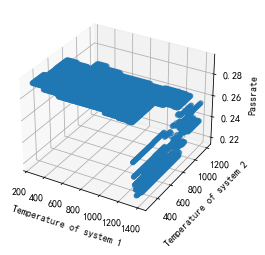

In [31]:
%matplotlib inline
# 绘图
fig = plt.figure()
axe = plt.axes(projection='3d')
x_line = np.array([])
y_line = np.array([])
z_line = np.array([])
for temp1 in range(250, 1410, 10):
    for temp2 in range(290, 1210, 10):
        x_pred_1 = np.array([[temp1, temp2 , 56.71, 111.46, 46.67, 18.48, 1.25, 257.86, 157.46]])
        x_line = np.append(x_line, temp1)
        y_line = np.append(y_line, temp2)
        z_line = np.append(z_line, model_forest.predict(x_pred_1))

# x_vector = [[x, y, 56.27, 111.38, 47.52, 20.26, 1.25, 290.75, 160.56] for x, y in zip(x_line, y_line)]
# x_pred_1 = np.array(x_vector, dtype='object')

axe.scatter3D(x_line, y_line, z_line, cmap='Greens')
axe.set_xlabel('Temperature of system 1')
axe.set_ylabel('Temperature of system 2')
axe.set_zlabel('Passrate')
plt.show()

[]

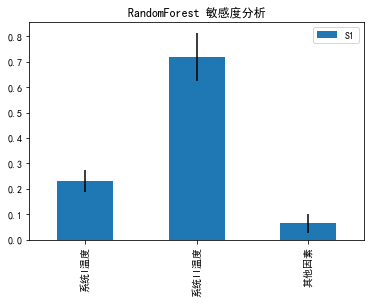

In [16]:
# 敏感度分析
problem = {
        'num_vars':9,
        'names':['系统I温度', '系统II温度',
                '其他因素', '原矿参数 2', 
                '原矿参数 3', '原矿参数 4',
                '过程数据 1', '过程数据 3',
                '过程数据 4'],
        'bounds':[[100.00, 1000.00], [500.00, 1000.00], 
                [58.00, 70.00], [150.00, 160.00],
                [80.00, 90.00], [60.00, 80.00],
                [1.00, 2.00], [260.00, 280.00],
                [140.00, 160.00]]
}

param_values = saltelli.sample(problem, 1024)
y_out = model_forest.predict(param_values)
Si = sobol.analyze(problem, y_out)
Si_df = Si.to_df()
barplot(Si_df[1][0:3])
plt.title('RandomForest 敏感度分析')
plt.plot()

Text(35.0, 0.5, 'Test')

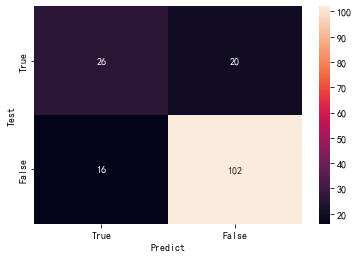

In [8]:
xlsx = pd.ExcelFile('./01.xlsx')
Datas_1 = pd.read_excel(xlsx, sheet_name='y_test')
Datas_2 = pd.read_excel(xlsx, sheet_name='y_pred_train')
y_true = Datas_1['y_true']
y_pred = Datas_2['y_pred']
matrix = confusion_matrix(y_true=y_true, y_pred=y_pred, labels=[1, 0])
df = pd.DataFrame(matrix, index=['True', 'False'], columns=['True', 'False'])
hp = sns.heatmap(df,annot=True, fmt='.20g')
hp.set_xlabel('Predict')
hp.set_ylabel('Test')